# Understanding the Amazon from Space by Planet
###### Use satellite data to track the human footprint in the Amazon rainforest

### Charlie Lu

![map](images/map.png)


The Amazon Basin sees the largest amount of deforestation in the world. Better data about location of deforestation and human impact allow governments and stakeholders to better respond more effectively.

This satelliate data comes from [Planet Labs](https://www.planet.com/), a company that designs CubeSats and owns the largest collection of Earth-orbiting satellites that can collect daily images of the Earth at 3-5 meter resolution. 

Traditional methods for tracking changes in forests usually depend on coarse-resolution images from Landsat or MODIS that can have trouble differentiating between human caused and natural forest loss.


## GeoTiff Chips
![chip](images/chip.jpg)

* Data comes from Panet's Flock 2 satellites ISS orbit between Jan 2016 and Feb 2017
* Scenes comprise of Amazon basin which include Brazil, Peru, Uruguay, Colombia ...
* Pixel size of 3 meters
* 4 Band Channel (RGB + Near Infrared)
* 1600 scenes (each covered land area of 30 million hectares)
* 

In [63]:
# imports
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline
from IPython.display import Image

# paths
IMG_PATH = '/Users/CJL/Documents/class_4360/amazon/'
TRAIN_LABELS = '/Users/CJL/Documents/class_4360/train_v2.csv'

IMG_EXT = '.jpg'

## Classes

* Labeled by Crowd Flower platfrom and experts in Berlin and SF teams
* Some mislabeled and even trained analysts can disagree on correct label
* Labels can be divided into three groups: atmospheric conditions, common land cover/use, and rare land cover/use.
* Each chip has multiple labels.
* Chips labeled as cloudy should have no other labels.

![classes](images/classes.jpg)

## Primary
![primary](images/primary.jpg)

## River
![river](images/river.jpg)

## Agriculture
![agg](images/agg1.jpg)

## Habitation
![hab](images/habitation1.jpg)

## Mining
![mine](images/mine1.jpg)

## Slashburn
![slash](images/slashburn2.jpg)

## Logging
![log](images/logging.jpg)

## Bare Earth
![bare](images/bare2.jpg)

## Bloomings
![bloom](images/bloom.jpg)

## Blowdown
![blow](images/blowdown.jpg)

# Evaluation Metric

F1 Score

$F_1 = 2 \cdot \frac{1}{\tfrac{1}{\mathrm{recall}} + \tfrac{1}{\mathrm{precision}}} = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}$

$F = \frac {(1 + \beta^2) \cdot \mathrm{true\ positive} }{(1 + \beta^2) \cdot \mathrm{true\ positive} + \beta^2 \cdot \mathrm{false\ negative} + \mathrm{false\ positive}}$

Beta F-Score

$(1 + \beta^2) \frac{pr}{\beta^2 p+r}\ \ \mathrm{where}\ \ p = \frac{tp}{tp+fp},\ \ r = \frac{tp}{tp+fn},\ \beta = 2.$

The `beta` parameter determines the weight of precision in the combined score. `beta < 1` lends more weight to precision, while `beta > 1` favors recall (`beta -> 0` considers only precision, `beta -> inf` only recall).

   
    image_name,tags
    test_0,agriculture road water
    test_1,primary clear
    test_2,haze primary
    etc.

In [71]:
df_train = pd.read_csv(TRAIN_LABELS)
df_train.head(10)

image_name                                         tags
0    train_0                                 haze primary
1    train_1              agriculture clear primary water
2    train_2                                clear primary
3    train_3                                clear primary
4    train_4    agriculture clear habitation primary road
5    train_5                           haze primary water
6    train_6  agriculture clear cultivation primary water
7    train_7                                 haze primary
8    train_8        agriculture clear cultivation primary
9    train_9   agriculture clear cultivation primary road

## Distribution of Labels
![labels](images/label_sort.png)



## Correlation Matrix

![heatmap](images/heatmap.png)


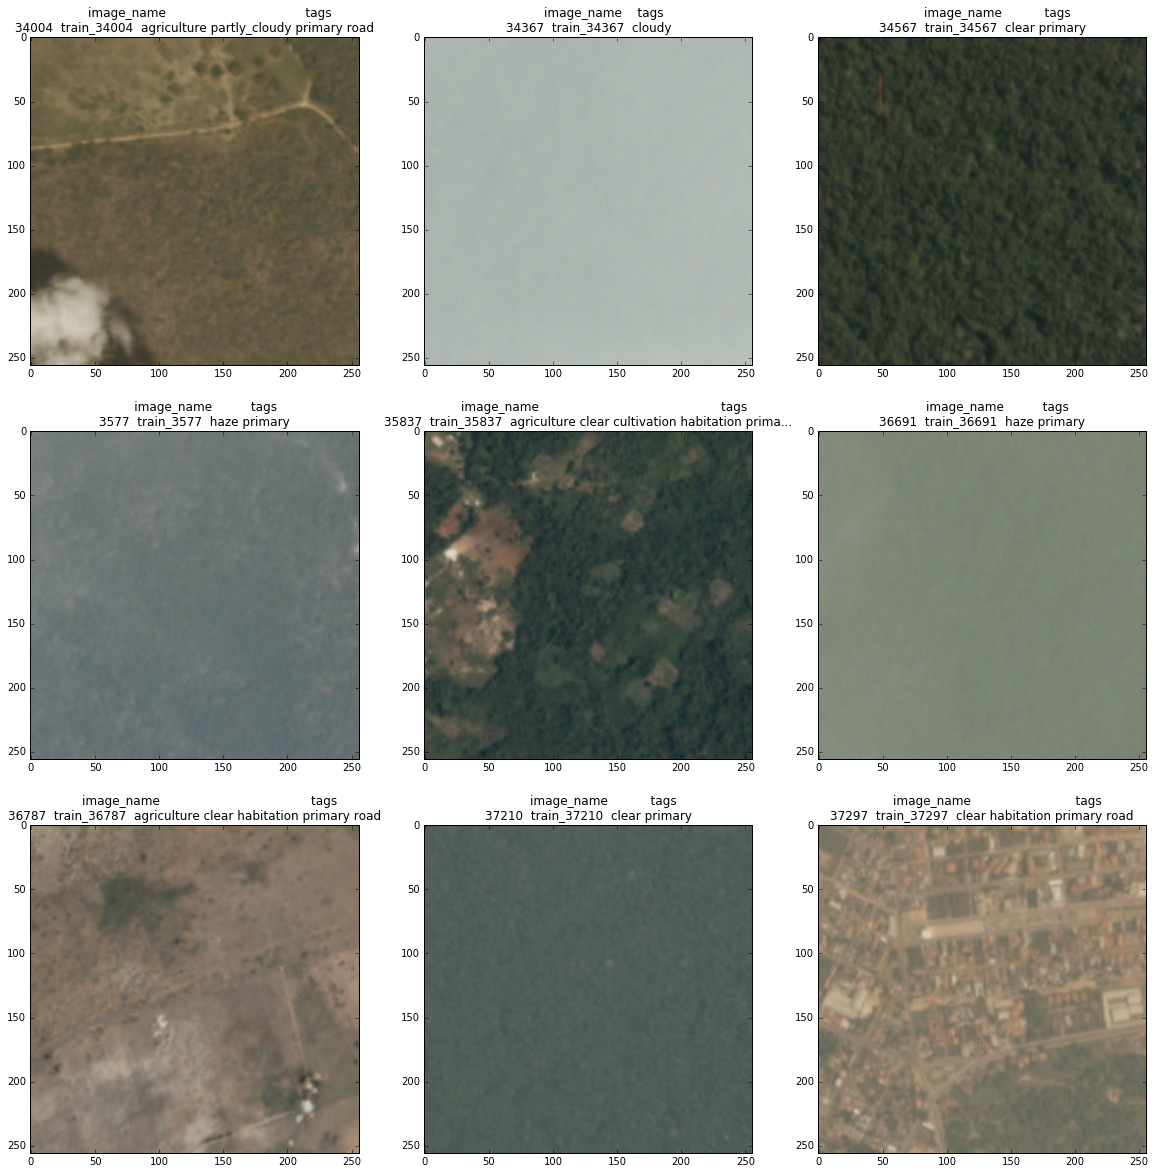

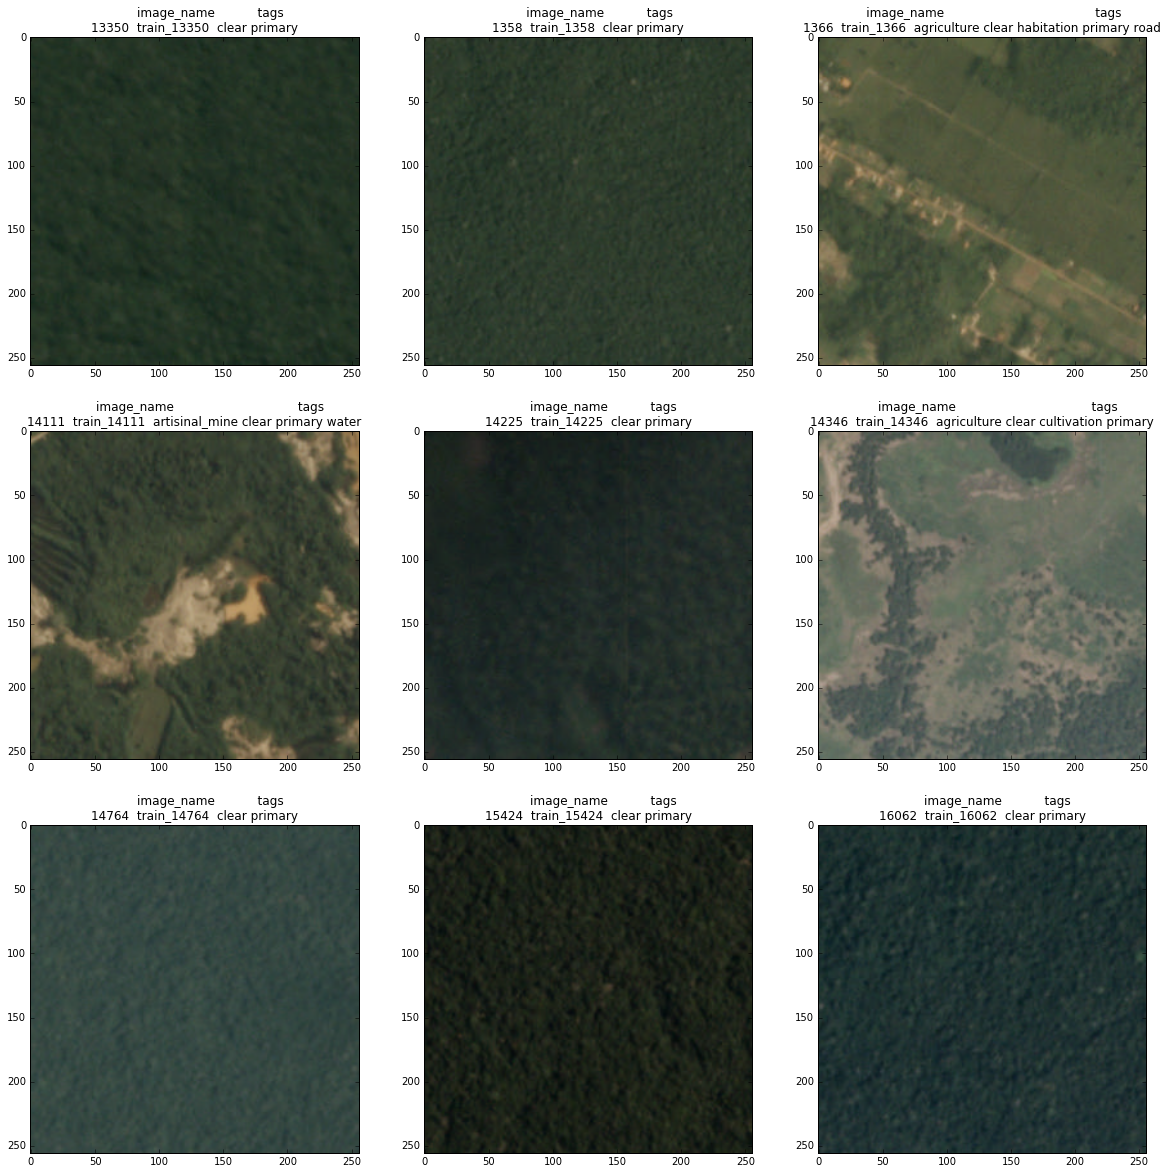

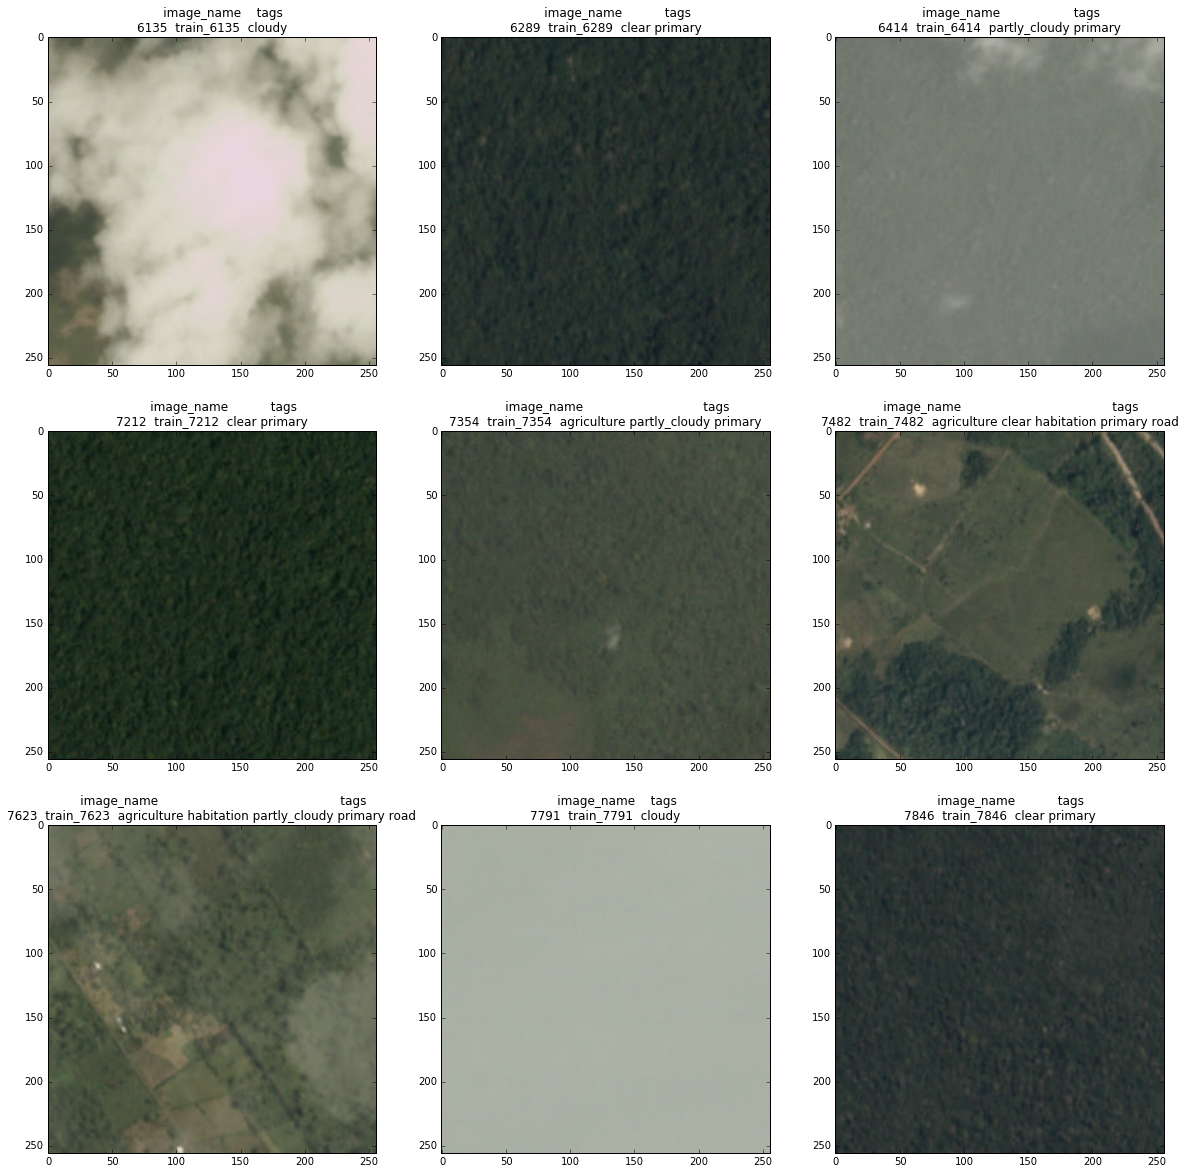

In [65]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))

for i, v in enumerate(os.listdir(IMAGES)[67:76]):
    plt.subplot(3, 3, i+1)
    plt.imshow(plt.imread('{}{}'.format(IMG_PATH, v)))
    plt.title('{}'.format(df_train[df_train.image_name == v[:-4]]))
    
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))

for i, v in enumerate(os.listdir(IMAGES)[9:18]):
    plt.subplot(3, 3, i+1)
    plt.imshow(plt.imread('{}{}'.format(IMG_PATH, v)))
    plt.title('{}'.format(df_train[df_train.image_name == v[:-4]]))
    
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(20, 20))

for i, v in enumerate(os.listdir(IMAGES)[87:96]):
    plt.subplot(3, 3, i+1)
    plt.imshow(plt.imread('{}{}'.format(IMG_PATH, v)))
    plt.title('{}'.format(df_train[df_train.image_name == v[:-4]]))

## Image Clustering

* Common technique to cluster images by pixel intensities and compute pairwise distances
* Clustered 1000 images using `squareform` and `pdist` from `scipy.spatial.distance`
* Very few images are dissimilar from all other images

![cluster](images/cluster.png)

### Clustering with T-SNE

* 2D embedding scatter plot
* Can see different types of land cover at opposite sides

![tsne](images/tsne.png)

## Spectral Analysis

### Raw Tiff chips
![tiff](images/tiff.png)

### agriculture clear primary water
![RGB](images/RGB-1.png)
### agriculture clear cultimation primary road
![RGB](images/RGB-9.png)
### clear habitation primary road
![RGB](images/RGB-67.png)

### Spectral Indexes Functions

* Normalized Difference Vegetation Index $\mbox{NDVI}=\frac{(\mbox{NIR}-\mbox{Red})}{(\mbox{NIR}+\mbox{Red})}$
  * Used in remote sensing to analyze green vegetation
  * Live plants absorb and re-emit solar radiation in a certain NIR region
- Enhanced Vegetation Index (EVI)
- Normalized Difference Water Index (NDWI)
- Soil-adjusted vegetation index 
$\mbox{SAVI}=\frac{(\mbox{1}+\mbox{L})(\mbox{NIR}-\mbox{Red})}{(\mbox{NIR}+\mbox{Red}+\mbox{L})}$
where L is a canopy background adjustment factor.
![panel](images/panels.png)

### Kernel Density Estimation

![panel](images/Density.png)

### Edge Detection

##### Canny Edge Detection Algo
1. Apply Gaussian filter to smooth image.
2. Find intensity gradients.
3. Apply Non-maximum suppression to reduce number of edges.
4. Apply Double Threshold to eliminate weak gradients.
5. Track edge by hysteresis i.e. Finalize edge detection by suppressing weak edges not connected to strong edges.
![panel](images/edge.png)
![panel](images/EdgeDetection.png)
![panel](images/dilation.png)

## Classifiers

#### Features
For each channel RGB
* mean
* std
* min
* max
* range
* kurtosis
* skewness



In [68]:
# XGBOOST

import numpy as np
from tqdm import tqdm
import scipy

for class_i in tqdm(range(n_classes), miniters=1): 
    model = xgb.XGBClassifier(max_depth=5, 
                              learning_rate=0.1, 
                              n_estimators=100,
                              silent=True, 
                              objective='binary:logistic', 
                              nthread=-1,
                              gamma=0,
                              min_child_weight=1,
                              max_delta_step=0, 
                              subsample=1,
                              colsample_bytree=1,
                              colsample_bylevel=1,
                              reg_alpha=0,
                              reg_lambda=1,
                              scale_pos_weight=1, 
                              base_score=0.5,
                              seed=random_seed,
                              missing=None)
    model.fit(X, y[:, class_i])
    y_pred[:, class_i] = model.predict_proba(X_test)[:, 1]

ImportError: No module named 'tqdm'

In [66]:
# 3 layer CNN

import cv2 
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=128, epochs=50, verbose=1,
          validation_data=(x_valid, y_valid))

# Epoch 50/50
# 20000/20000 [==============================] - 11s - 
# loss: 0.0769 - acc: 0.9658 - val_loss: 0.2194 - val_acc: 0.9400

from sklearn.metrics import fbeta_score

p_valid = model.predict(x_valid, batch_size=128)
print(fbeta_score(y_valid, np.array(p_valid) > 0.2, beta=2, average='samples'))

# F-score
# 0.854775001503

ImportError: No module named 'cv2'

### Does well on easy examples
### Should focus on hard group

# Challenges

## Weather

### Haze
![haze](images/haze1.jpg)
![haze](images/haze2.jpg)

### Clouds
![clouds](images/cloudy_1.jpg)
![clouds](images/cloudy_2.jpg)
![clouds](images/pc1.jpg)
![clouds](images/pc2.jpg)

## Finding Mislabeled Tags

In [78]:
train_df = pd.read_csv(TRAIN_LABELS)
tagnames = list(set([tag for sublist in train_df['tags'].apply(lambda tagstring: tagstring.split()) for tag in sublist]))
print('Tags: ' + '%s' % ', '.join(tagnames))

def containsTag(tag, taglist):
    if tag in taglist.split(): return 1
    else: return 0
    
for tag in tagnames:
    train_df[tag] = train_df['tags'].apply(lambda taglist: containsTag(tag, taglist))
    
train_df.head()

Tags: partly_cloudy, haze, primary, cloudy, agriculture, bare_ground, selective_logging, road, cultivation, slash_burn, conventional_mine, water, clear, artisinal_mine, blooming, blow_down, habitation


image_name                                       tags  partly_cloudy  haze  \
0    train_0                               haze primary              0     1   
1    train_1            agriculture clear primary water              0     0   
2    train_2                              clear primary              0     0   
3    train_3                              clear primary              0     0   
4    train_4  agriculture clear habitation primary road              0     0   

   primary  cloudy  agriculture  bare_ground  selective_logging  road  \
0        1       0            0            0                  0     0   
1        1       0            1            0                  0     0   
2        1       0            0            0                  0     0   
3        1       0            0            0                  0     0   
4        1       0            1            0                  0     1   

   cultivation  slash_burn  conventional_mine  water  clear  artisinal_mine  \
0            0           0                  0      0      0               0   
1            0           0                  0      1      1               0   
2            0           0                  0      0      1               0   
3            0           0                  0      0      1               0   
4            0           0                  0      0      1               0   

   blooming  blow_down  habitation  
0         0          0           0  
1         0          0           0  
2         0          0           0  
3         0          0           0  
4         0          0           1

In [77]:
train_df[train_df[['clear', 'haze', 'partly_cloudy', 'cloudy']].sum(axis=1) != 1]

image_name   tags  partly_cloudy  haze  primary  cloudy  agriculture  \
24448  train_24448  water              0     0        0       0            0   

       bare_ground  selective_logging  road  cultivation  slash_burn  \
24448            0                  0     0            0           0   

       conventional_mine  water  clear  artisinal_mine  blooming  blow_down  \
24448                  0      1      0               0         0          0   

       habitation  
24448           0

* All images should have an atmospheric condition tag
### Water
![train_24448](images/train_24448.png)

### Compare with Water with Haze

![train_3561](images/train_3561.png)

### Compare with Water with Clear

![train_2750](images/train_2750.png)

In [85]:
Labels.loc[24448, 'clear'] = 1
Labels.loc[24448, 'tags'] = 'clear water'

NameError: name 'Labels' is not defined

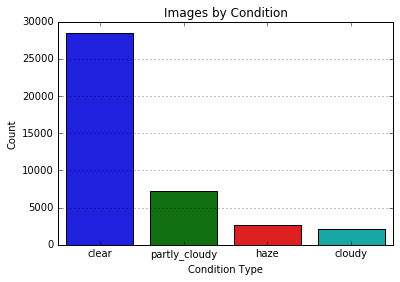

In [81]:
import seaborn as sns

ConditionCounts = train_df[['clear', 'haze', 'partly_cloudy', 'cloudy']].sum().sort_values(ascending=False)
ConditionCounts = ConditionCounts.reset_index(name='Count')
fig = sns.barplot(x='index', y='Count', data=ConditionCounts)
fig.set(xlabel='Condition Type', ylabel='Count', title='Images by Condition')
fig.grid(True, axis='y', ls=':')

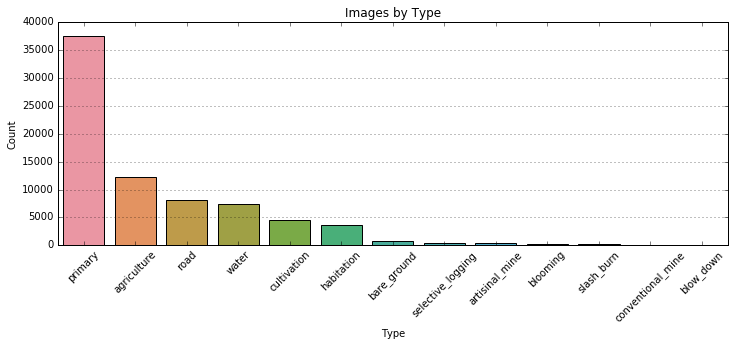

In [82]:
typeTags = ['artisinal_mine', 'blow_down', 'water', 'cultivation', 'road', 'agriculture',
            'bare_ground', 'blooming', 'selective_logging', 'habitation', 'conventional_mine',
            'slash_burn', 'primary']

TypeCounts = train_df[train_df.columns[train_df.columns.isin(typeTags)]].sum().sort_values(ascending=False)
TypeCounts = TypeCounts.reset_index(name='Count')
fig = plt.figure(figsize=(12, 4))
fig = sns.barplot(x='index', y='Count', data=TypeCounts)
fig.set(xlabel='Type', ylabel='Count', title='Images by Type')
fig.grid(True, axis='y', ls=':')
# Rotate the tick-labels
for ticklabel in fig.get_xticklabels():
    ticklabel.set_rotation(45)

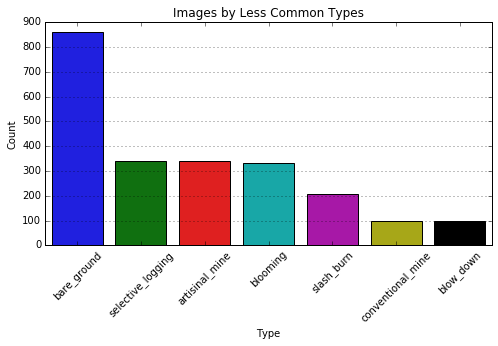

In [83]:
# Focusing on the rare types:
RareTypeCounts = train_df[['artisinal_mine', 'blow_down', 'bare_ground', 'blooming',
                         'selective_logging', 'conventional_mine',
                         'slash_burn']].sum().sort_values(ascending=False)
RareTypeCounts = RareTypeCounts.reset_index(name='Count')
fig = plt.figure(figsize=(8, 4))
fig = sns.barplot(x='index', y='Count', data=RareTypeCounts)
fig.set(xlabel='Type', ylabel='Count', title='Images by Less Common Types')
fig.grid(True, axis='y', ls=':')
# Rotate the tick-labels
for ticklabel in fig.get_xticklabels():
    ticklabel.set_rotation(45)

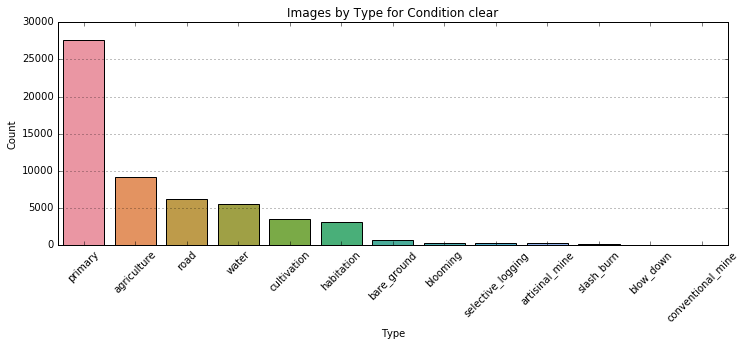

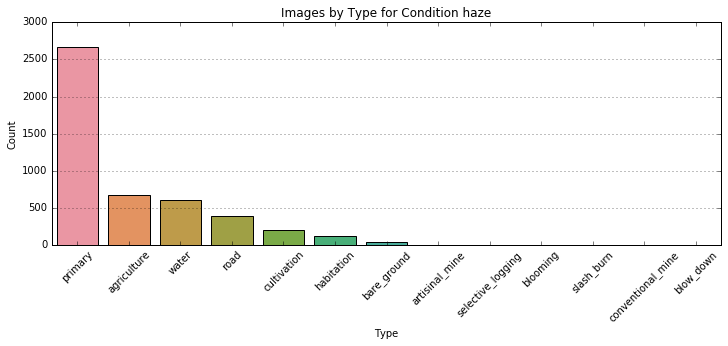

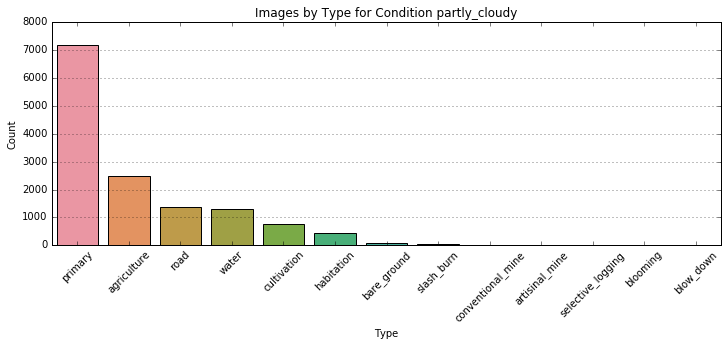

In [84]:
for condition in ['clear', 'haze', 'partly_cloudy']:
    _ConditionalTypeCounts = train_df[train_df.columns[train_df.columns.isin(typeTags)]][train_df[condition] == 1].sum().sort_values(ascending=False)
    _ConditionalTypeCounts = _ConditionalTypeCounts.reset_index(name='Count')
    fig = plt.figure(figsize=(12, 4))
    fig = sns.barplot(x='index', y='Count', data=_ConditionalTypeCounts)
    fig.set(xlabel='Type', ylabel='Count', title='Images by Type for Condition %s' % condition)
    fig.grid(True, axis='y', ls=':')
    # Rotate the tick-labels
    for ticklabel in fig.get_xticklabels():
        ticklabel.set_rotation(45)

### Visualize Random Images

![670](images/670.png)
![221](images/12758.png)
![38500](images/38500.png)
![12758](images/12758.png)
![16751](images/16751.png)
![6686](images/6686.png)


In [91]:
pd.set_option("display.max_columns", 100)
color_df = pd.read_csv('images/ColorStatsDF.csv')
color_df.head()

Unnamed: 0       r_mean  r_median       r_std  r_max  r_min  r_kurtosis  \
0           0  2823.257050      2819   85.647217   3396   2469    0.965014   
1           1  2477.354996      2336  383.497120   5510   1809    4.923805   
2           2  2030.450165      2031  112.283244   2752   1613    0.298555   
3           3  2479.578049      2478  111.271727   3384   2090    1.189625   
4           4  3381.794922      3228  611.183348   8479   2348    6.517757   

   r_skewness       g_mean  g_median       g_std  g_max  g_min  g_kurtosis  \
0    0.387792  4369.526978      4367   83.879425   4856   4034    0.547369   
1    1.713841  3666.500900      3510  421.583711   6118   2836    0.554345   
2    0.058924  3214.830826      3217  112.536970   3820   2788    0.101043   
3    0.358904  3699.635529      3700  115.832992   4386   3239    0.342273   
4    2.443548  4433.354370      4295  575.751792   9518   3352    5.582191   

   g_skewness       b_mean  b_median       b_std  b_max  b_min  b_kurtosis  \
0    0.233650  5226.039261      5224   91.665121   5794   4860    0.597669   
1    0.996892  4312.921616      4246  273.744368   6697   3637    4.451386   
2   -0.037807  3952.491165      3952   96.707288   4537   3572    0.362588   
3    0.147777  4602.361969      4601  107.109551   5368   4095    0.765090   
4    2.198323  5082.952789      5000  407.905704  10492   4210    9.057131   

   b_skewness       n_mean  n_median        n_std  n_max  n_min  n_kurtosis  \
0    0.165912  6126.069626      6122   406.868986   8527   4559    0.295068   
1    1.410764  7140.713974      7086  1295.642057  11467   3128   -0.383098   
2    0.075739  5774.253342      5790   724.758868   8783   2964    0.039722   
3    0.233627  5577.092361      5598   630.781636   8278   3434    0.048179   
4    2.325429  8818.953049      8713  1314.023509  13208   4887   -0.076711   

   n_skewness  
0    0.112706  
1    0.041964  
2   -0.094088  
3   -0.092494  
4    0.422574

### Find outliers
![clear](images/clear primary_r_mean.png)
![clear](images/clear primary_g_mean.png)
![clear](images/clear primary_b_mean.png)
![clear](images/clear primary_n_mean.png)
![clear](images/clear primary_r_std.png)
![clear](images/clear primary_g_std.png)
![clear](images/clear primary_b_std.png)
![clear](images/clear primary_n_std.png)
![clear](images/clear primary_r_median.png)
![clear](images/clear primary_g_median.png)
![clear](images/clear primary_b_median.png)
![clear](images/clear primary_n_median.png)
![clear](images/clear primary_r_max.png)
![clear](images/clear primary_g_max.png)
![clear](images/clear primary_b_max.png)
![clear](images/clear primary_n_max.png)
![clear](images/clear primary_r_min.png)
![clear](images/clear primary_g_min.png)
![clear](images/clear primary_b_min.png)
![clear](images/clear primary_n_min.png)
![clear](images/clear primary_r_skewness.png)
![clear](images/clear primary_g_skewness.png)
![clear](images/clear primary_b_skewness.png)
![clear](images/clear primary_n_skewness.png)
![clear](images/clear primary_r_kurtosis.png)
![clear](images/clear primary_g_kurtosis.png)
![clear](images/clear primary_b_kurtosis.png)
![clear](images/clear primary_n_kurtosis.png)

### Probelm Images
![221](images/221.png)
![1270](images/1270.png)
![1652](images/1652.png)
![3518](images/3518.png)
![4639](images/4639.png)
![7112](images/7112.png)
![12645](images/12645.png)
![14687](images/14687.png)
![23638](images/23638.png)
![28381](images/28381.png)
![34729](images/34729.png)
![4639](images/4639.png)
![25513](images/25513.png)

### 3rd Place Workflow

##### Software
* Windows 10, Python 3.4 + 3.5
* Keras 1.2.1 - main framework for CNN training
* Theano 0.9.2 - main backend
* Tensorflow - additional backend for neural nets which is not supported by Theano (ResNet152 and XCeption)
* XGboost, LightGBM, Keras - main classificators for final ensemble
* OpenCV - image preprocessing

##### Hardware
* We used 6 GPUs: 2*1080Ti + 4*1080.
* Parallelization was made using either different fold on different GPUs, or different CNNs on different GPUs.

##### Training Time
* On single GPU around a month for full pipeline. On 6 GPUs it’s possible to finish in around 1 week.

![flow](images/Dataflow.png)

### Set of CNN based models

* 11 models for different CNNs with 17 output neurons with sigmoid activation. Set of CNNs: INCEPTION_V3, INCEPTION_V4, DENSENET_121, DENSENET_169, DENSENET_161, RESNET50, RESNET101, VGG16, VGG19, RESNET152, XCEPTION
* 1 DENSENET_121 model with weather classes only: ['clear', 'partly_cloudy', 'haze', 'cloudy']. “Softmax” activation because classes is mutually exclusive - 4 output neurons.
* 1 DENSENET_121 model with land classes only - 13 output neurons.
* 17 DENSENET_121 models for single classe. Each model has 1 output neuron to predict single class. 50/50 batches, where half of images have class presented.

We used 5 KFold Cross Validation. So each model has 5 different weights set. 30 CNN models in total. 150 weight files

## GAN for Data augmentation
![GAN](images/fake_samples_epoch_107.png)

## Sources 

USGS Guide on Landsat: https://landsat.usgs.gov/sites/default/files/documents/si_product_guide.pdf

Cloud detection: https://weather.msfc.nasa.gov/sport/journal/pdfs/2009_GRS_Jedlovec.pdf

Water Detection: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4970121/

NDWI: https://en.wikipedia.org/wiki/Normalized_difference_water_index